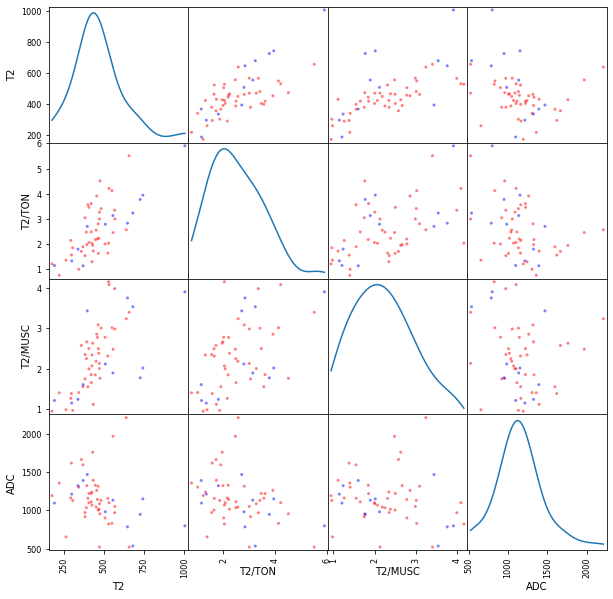

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

def plot_roc_curve(fpr, tpr, auc):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

xls = pd.ExcelFile("feature_sheet.xls")
patient_dataframe = xls.parse('Sheet1', index_col = None, na_values= ['NA'])
colours_palette = {1:"red", 0: "blue"}
output_data = patient_dataframe['DISEASE']
colours = [colours_palette[c] for c in output_data]

patient_dataframe = patient_dataframe.drop('DISEASE', 1)
patient_dataframe = patient_dataframe.drop('T2 QUAL', 1)

matrix_of_scatterplots = scatter_matrix(patient_dataframe, figsize=(10,10), color=colours, diagonal = 'kde')
plt.show()

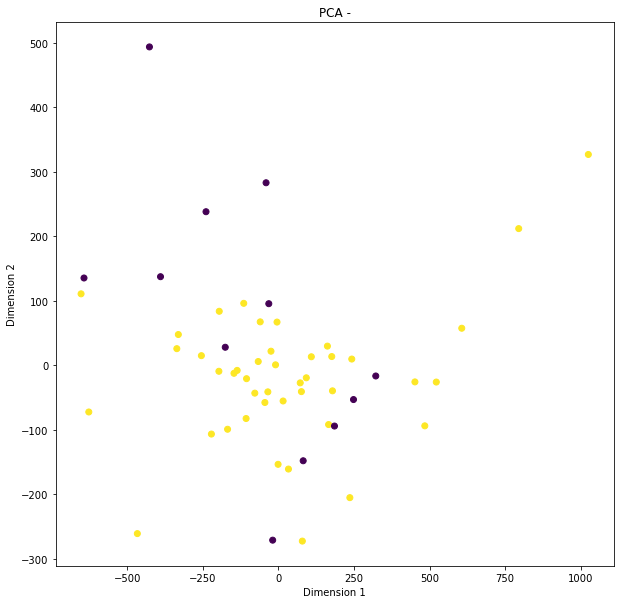

In [13]:
X= patient_dataframe.to_numpy()
plt.figure(figsize=(10,10))
X_pca = PCA().fit_transform(X)
plt.title('PCA -')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0],X_pca[:,1], c= output_data)